# Setup

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# References

## Numpy
In OpenCV images are represented as native Numpy arrays: vectors, matrices, and tensors. Here are some useful links to 
Numpy array operations
- Indexing https://numpy.org/devdocs/user/basics.indexing.html
- Broadcasting https://numpy.org/devdocs/user/basics.broadcasting.html

## OpenCV Tutorials

- Python tutorial: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_root.html
- Alternative site: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html


## Topics for this Notebook

- **Image Thresholding**, convert images to binary images using global thresholding, Adaptive thresholding, Otsu’s binarization etc [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_thresholding.html#doxid-d7-d4d-tutorial-py-thresholding)
- **Smoothing Images**, blur the images, filter the images with custom kernels 
[Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_filtering.html#doxid-d4-d13-tutorial-py-filtering)
- **Morphological Transformations**, morphological transformations like Erosion, Dilation, Opening, Closing
[Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_morphological_ops.html#doxid-d9-d61-tutorial-py-morphological-ops)
- **Image Gradients**, find image gradients, edges [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_gradients.html#doxid-d5-d0f-tutorial-py-gradients)
- **Canny Edge Detection**, find edges with Canny Edge Detection [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_canny.html#doxid-da-d22-tutorial-py-canny)
- **Contours in OpenCV** [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_table_of_contents_contours.html#doxid-d3-d05-tutorial-py-table-of-contents-contours)
- **Hough Line Transform**, detect lines in an image [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghlines.html#doxid-d6-d10-tutorial-py-houghlines)
- **Hough Circle Transform**, detect circles in an image [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghcircles.html#doxid-da-d53-tutorial-py-houghcircles)


# Convolution

A number of image processing operations can be performed using convolution kernels. OpenCV provides functions for the most common operations that create the kernel based on given parameters. However, we can also define convolution kernels from scratch and apply them with `cv2.filter2D()`

**Usage:**

`filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst`

The function applies an arbitrary linear filter to an image. In-place operation is supported. When
the aperture is partially outside the image, the function interpolates outlier pixel values
according to the specified border mode.

The function does actually compute correlation, not the convolution:

$\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )$

That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
anchor.y - 1)`.

The function uses the DFT-based algorithm in case of sufficiently large kernels (~`11 x 11` or
larger) and the direct algorithm for small kernels.

**Parameters:**

- `src` input image.
- `dst` output image of the same size and the same number of channels as src.
- `ddepth` desired depth of the destination image, see @ref filter_depths "combinations"
- `kernel` convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split and process them individually.
- `anchor` anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
- `delta` optional value added to the filtered pixels before storing them in dst.
- `borderType` pixel extrapolation method, see #BorderTypes. #BORDER_WRAP is not supported.

**See also:** `sepFilter2D`, `dft`, `matchTemplate`

(220, 290)


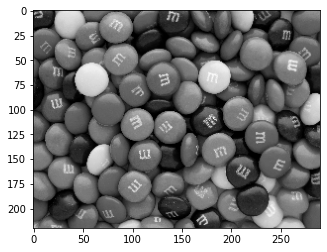

In [4]:
img = cv2.cvtColor(cv2.resize(cv2.imread('images/Plain-MnMs-Pile.jpg'), (290, 220)), cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img, cmap='gray')

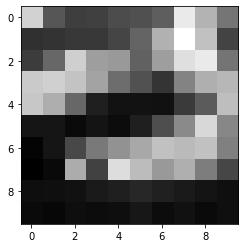

In [6]:
plt.imshow(img[:10, :10], cmap='gray')

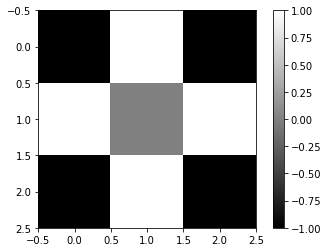

In [20]:
filt = np.array([[-1, 1, -1],
                 [ 1, 0,  1],
                 [-1, 1, -1]]
               )
filt_sum = filt.sum()
if filt_sum>1:
    filt = filt / filt_sum
plt.imshow(filt, cmap='gray')
plt.colorbar()

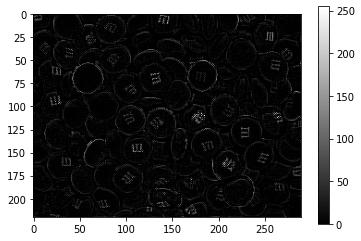

In [31]:
conv = cv2.filter2D(img, -1, filt)
plt.imshow(conv, cmap='gray')
plt.colorbar()
plt.show(); plt.close()

# Sobel Edge Detection

https://en.wikipedia.org/wiki/Sobel_operator

The Sobel methods applies two convolution filters (actually a filter and its transpose) 

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/767a425adccc7f13b2fac6d42e5f7ccdd6cac288)

In [22]:
! ls images/

Plain-MnMs-Pile.jpg  Plain-MnMs-Pile2.jpg


array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

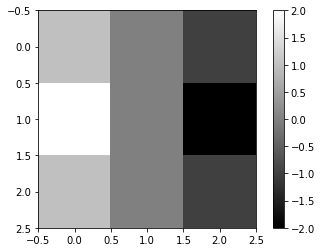

In [98]:
# original
sf = np.array([[ +1, 0, -1],
               [ +2, 0, -2],
               [ +1, 0, -1]])

# # Let's use the Sobel-Feldman operator
# sf = np.array([[ +3, 0,  -3],
#                [+10, 0, -10],
#                [ +3, 0,  -3]])


display(sf)
display(sf.T)
plt.imshow(sf, cmap='gray')
plt.colorbar()
plt.show(); plt.close()

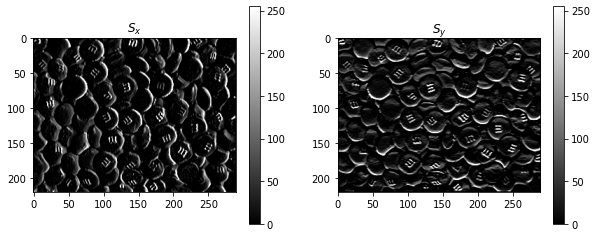

In [99]:
sx = cv2.filter2D(img, -1, sf)
sy = cv2.filter2D(img, -1, sf.T)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sx, cmap='gray')
plt.title('$S_x$')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(sy, cmap='gray')
plt.title('$S_y$')
plt.colorbar()
plt.show(); plt.close()



Next step: squaring each element. We use the Hadamard product
https://stackoverflow.com/questions/40034993/how-to-get-element-wise-matrix-multiplication-hadamard-product-in-numpy

In [46]:
# Double check if the '*' operator really produces what we want
A = np.array(range(12)).reshape(4,3)
display(A)
display(A*A)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121]])

In [48]:
display(np.sqrt(A*A))

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [50]:
display(A+A)

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [43]:
sx.shape, (sx * sx).shape

((220, 290), (220, 290))

In [61]:
sx2 = sx * sx
sy2 = sy * sy
mag = np.sqrt((sx * sx) + (sy * sy))

In [63]:
np.roundmag.max()

15.81

In [114]:
mag.astype(np.uint8)

array([[ 0, 14, 15, ...,  8, 12,  0],
       [ 8,  0,  0, ..., 15, 14,  0],
       [ 0,  0,  0, ..., 12,  0,  0],
       ...,
       [ 0, 15,  4, ...,  8, 14,  0],
       [ 0, 13,  0, ...,  8,  0,  0],
       [ 0, 14, 12, ..., 10,  0,  0]], dtype=uint8)

In [123]:
mag_int.dtype=='uint8'

False

Next steps in Sobel

(220, 290)
max value: 15.8125 min value: 0.0 shape: (220, 290)


array([[255,   0,   0, ...,   0,   0, 255],
       [  0, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0, 255, 255],
       ...,
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0, 255, ...,   0, 255, 255],
       [255,   0,   0, ...,   0, 255, 255]], dtype=uint8)

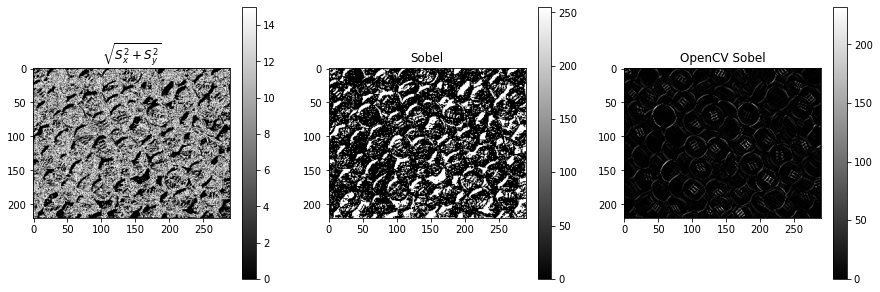

In [124]:

sx2 = sx * sx
sy2 = sy * sy
mag = np.sqrt((sx * sx) + (sy * sy))
print(mag.shape)

# Note: OpenCV doesn't work with an datatype. Matrix elements must be either of type 'uint8' or 'float32'
#       After numerical matrix operation we need to check that the resulting image is one of these types

if mag.dtype !='uint8':
    mag = mag.astype(np.uint8)

print(f"max value: {mag_int.max()} min value: {mag_int.min()} shape: {mag_int.shape}")

# display(mag)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(mag, cmap='gray')
plt.title('$\sqrt{S_x^2 + S_y^2}$')
plt.colorbar()

thresh = 1

# sob =  (mag < thresh)  
ret, sob = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY_INV)
display(sob)
plt.subplot(1,3,2)
plt.imshow(sob, cmap='gray')
plt.title('Sobel')
plt.colorbar()

### OpenCV implementation
sob2 = cv2.Sobel(img, -1, 1, 1, )

plt.subplot(1,3,3)
plt.imshow(sob2, cmap='gray')
plt.title('OpenCV Sobel')
plt.colorbar()
plt.show(); plt.close()

## OpenCV Sobel
`Sobel(...)` calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.

    ```Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst```
    
In all cases except one, the $\texttt{ksize} \times \texttt{ksize}$ separable kernel is used to
calculate the derivative. When $\texttt{ksize = 1}$, the $3 \times 1$ or $1 \times 3$
kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
or the second x- or y- derivatives.

There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the $3\times3$ Scharr
filter that may give more accurate results than the $3\times3$ Sobel. The Scharr aperture is

```
[[  3,   0,  -3],
 [ 10,   0, -10],
 [  3,   0,  -3]]
```

for the x-derivative, or transposed for the y-derivative.

The function calculates an image derivative by convolving the image with the appropriate kernel:

$\texttt{dst} =  rac{\partial^{xorder+yorder} \texttt{src}}{\partial x^{xorder} \partial y^{yorder}}$

The Sobel operators combine Gaussian smoothing and differentiation, so the result is more or less
resistant to the noise. Most often, the function is called with ( xorder = 1, yorder = 0, ksize = 3)
or ( xorder = 0, yorder = 1, ksize = 3) to calculate the first x- or y- image derivative. The first
case corresponds to a kernel of:

```
[[ 1,   0, -1],
 [ 2,   0, -2],
 [ 1,   0, -1]]
```



The second case corresponds to a kernel of:
```
[[  1,  2,  1],
 [  0,  0,  0],
 [ -1, -2, -1]]
```

**Parameters:**

- src input image.
- dst output image of the same size and the same number of channels as src .
- ddepth output image depth, see @ref filter_depths "combinations"; in the case of
    8-bit input images it will result in truncated derivatives.
- dx order of the derivative x.
- dy order of the derivative y.
- ksize size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
- scale optional scale factor for the computed derivative values; by default, no scaling is applied (see #getDerivKernels for details).
- delta optional delta value that is added to the results prior to storing them in dst.
- borderType pixel extrapolation method, see #BorderTypes. #BORDER_WRAP is not supported.


**See also**  Scharr, Laplacian, sepFilter2D, filter2D, GaussianBlur, cartToPolar


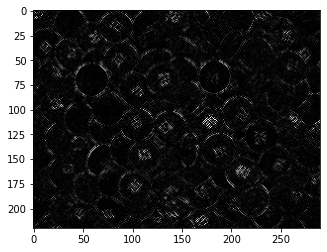

In [126]:
sob2 = cv2.Sobel(img, -1, 2, 2, 7 )
plt.imshow(sob2, cmap='gray')

In [128]:
print(f"Possible 'borderType' values: {', '.join(filter(lambda s: s.startswith('BORDER_'), dir(cv2)))}")

Possible 'borderType' values: BORDER_CONSTANT, BORDER_DEFAULT, BORDER_ISOLATED, BORDER_REFLECT, BORDER_REFLECT101, BORDER_REFLECT_101, BORDER_REPLICATE, BORDER_TRANSPARENT, BORDER_WRAP


# Contours
TBD

# Hough Transform

The Hough transform is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure. This voting procedure is carried out in a parameter space, from which object candidates are obtained as local maxima in a so-called accumulator space that is explicitly constructed by the algorithm for computing the Hough transform.

The classical Hough transform was concerned with the identification of lines in the image, but later the Hough transform has been extended to identifying positions of arbitrary shapes, most commonly circles or ellipses. The Hough transform as it is universally used today was invented by Richard Duda and Peter Hart in 1972, who called it a "generalized Hough transform" after the related 1962 patent of Paul Hough. The transform was popularized in the computer vision community by Dana H. Ballard through a 1981 journal article titled "Generalizing the Hough transform to detect arbitrary shapes".

References:
- https://en.wikipedia.org/wiki/Hough_transform
- https://en.wikipedia.org/wiki/Generalised_Hough_transform
- https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghlines.html#doxid-d6-d10-tutorial-py-houghlines
- https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghcircles.html#doxid-da-d53-tutorial-py-houghcircles

Size of image: (440, 580, 3) Number of pixels: 255,200


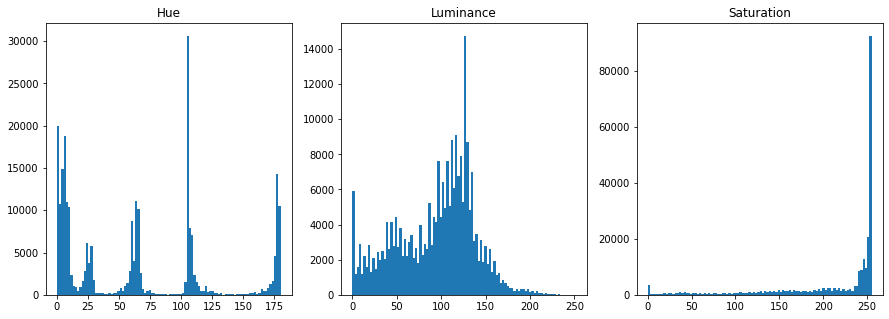

In [185]:
hls = cv2.cvtColor(cv2.imread('images/Plain-MnMs-Pile.jpg'), cv2.COLOR_BGR2HLS)
hls = cv2.resize(hls, (580, 440))
n = hls.shape[0]*hls.shape[1]
print(f"Size of image: {hls.shape} Number of pixels: {n:,}")

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(hls[:,:,0].reshape(n), bins=100)
plt.title("Hue")
plt.subplot(1,3,2)
plt.hist(hls[:,:,1].reshape(n), bins=100)
plt.title("Luminance")
plt.subplot(1,3,3)
plt.hist(hls[:,:,2].reshape(n), bins=100)
plt.title("Saturation")
plt.show(); plt.close()


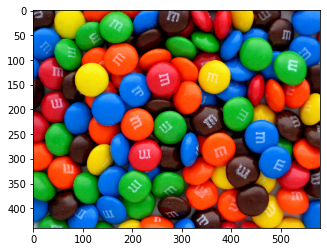

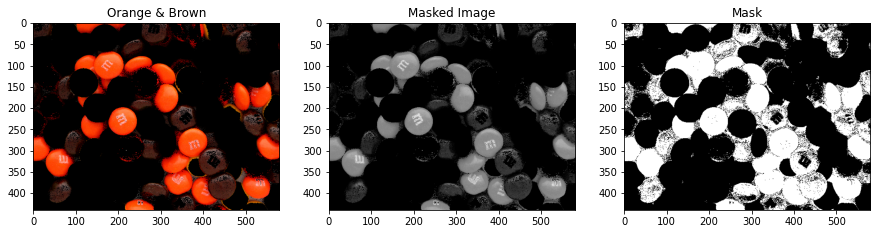

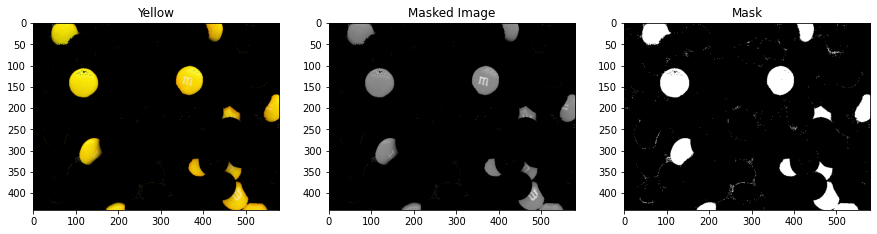

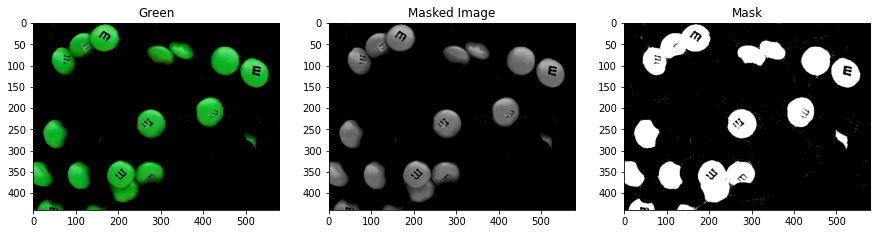

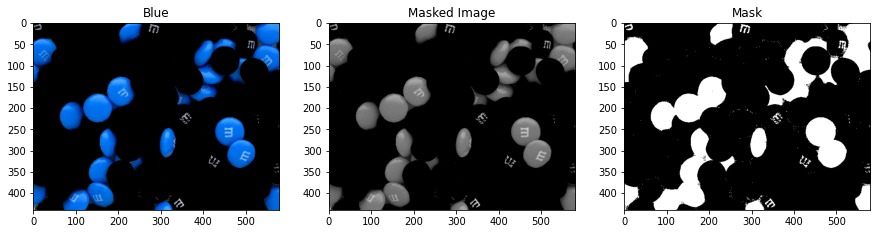

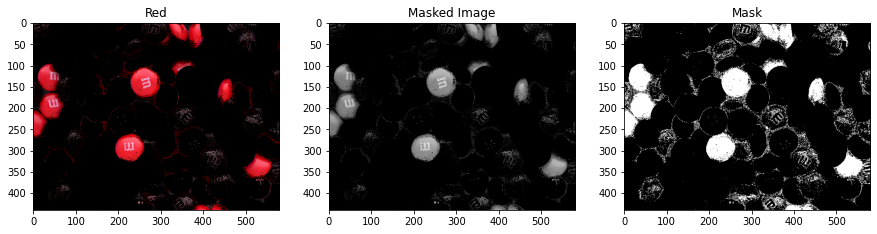

In [194]:
plt.imshow(cv2.cvtColor(hls, cv2.COLOR_HLS2RGB))
plt.show(); plt.close()

colors = [(0, 17, 'Orange & Brown'), (19, 30, 'Yellow'), (45, 70, 'Green'), (100, 125, 'Blue'), (160, 180, 'Red')]

mm_mask = {}
mm_img = {}

for j, sep in enumerate(colors):
    mask = (hls[:,:,0]>=sep[0]) & (hls[:,:,0]<=sep[1])
    tmp1 = hls.copy()
    tmp1[~mask[:,:], 1] = 0
    tmp1[~mask[:,:], 2] = 0
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(tmp1, cv2.COLOR_HLS2RGB))
    plt.title(sep[2])
    
    plt.subplot(1,3,2)
    tmp2 = hls[:,:,1].copy()
    tmp2[~mask[:,:]] = 0
    plt.imshow(tmp2, cmap='gray')
    plt.title("Masked Image")
    
    plt.subplot(1,3,3)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    
    plt.show(); plt.close()
    mm_mask[sep[2]] = mask
    mm_img[sep[2]] = tmp2

# Hough Circle

https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghcircles.html#doxid-da-d53-tutorial-py-houghcircles

    
    HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles

Finds circles in a grayscale image using the Hough transform.
The function finds circles in a grayscale image using a modification of the Hough transform.

**Note:**

Usually the function detects the centers of circles well. However, it may fail to find correct
radii. You can assist to the function by specifying the radius range ( minRadius and maxRadius ) if
you know it. Or, in the case of #HOUGH_GRADIENT method you may set maxRadius to a negative number
to return centers only without radius search, and find the correct radius using an additional procedure.

It also helps to smooth image a bit unless it's already soft. For example,
GaussianBlur() with 7x7 kernel and 1.5x1.5 sigma or similar blurring may help.

**Parameters:**

- `image` 8-bit, single-channel, grayscale input image.
- `circles` Output vector of found circles. Each vector is encoded as  3 or 4 element
floating-point vector $(x, y, radius)$ or $(x, y, radius, votes)$ .
- `method` Detection method, see #HoughModes. The available methods are #HOUGH_GRADIENT and #HOUGH_GRADIENT_ALT.
- `dp` Inverse ratio of the accumulator resolution to the image resolution. For example, if
dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has
half as big width and height. For #HOUGH_GRADIENT_ALT the recommended value is dp=1.5,
unless some small very circles need to be detected.
- `minDist` Minimum distance between the centers of the detected circles. If the parameter is
too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is
too large, some circles may be missed.
- `param1` First method-specific parameter. In case of #HOUGH_GRADIENT and #HOUGH_GRADIENT_ALT,
it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
Note that #HOUGH_GRADIENT_ALT uses #Scharr algorithm to compute image derivatives, so the threshold value
shough normally be higher, such as 300 or normally exposed and contrasty images.
- `param2` Second method-specific parameter. In case of #HOUGH_GRADIENT, it is the
accumulator threshold for the circle centers at the detection stage. The smaller it is, the more
false circles may be detected. Circles, corresponding to the larger accumulator values, will be
returned first. In the case of #HOUGH_GRADIENT_ALT algorithm, this is the circle "perfectness" measure.
The closer it to 1, the better shaped circles algorithm selects. In most cases 0.9 should be fine.
If you want get better detection of small circles, you may decrease it to 0.85, 0.8 or even less.
But then also try to limit the search range [minRadius, maxRadius] to avoid many false circles.
- `minRadius` Minimum circle radius.
- `maxRadius` Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, #HOUGH_GRADIENT returns
centers without finding the radius. #HOUGH_GRADIENT_ALT always computes circle radiuses.

**See also:** `fitEllipse`, `minEnclosingCircle`

In [219]:
# Pick green M&Ms
gray = mm_img['Green']

# Let's use some default parameters...
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                            param1=50, param2=30, minRadius=0, maxRadius=0)

# What about limiting the range of allowed radii?
# circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
#                             param1=50, param2=30, minRadius=20, maxRadius=80)
print(f"Number of circles found: {circles.shape[1]:,}")

Number of circles found: 304


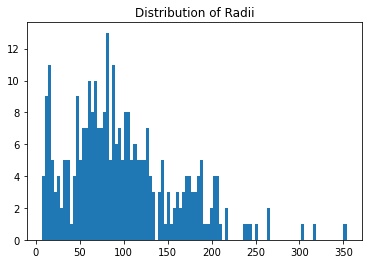

In [220]:
radii = circles[0, :, 2]
plt.hist(radii, bins=100)
plt.title("Distribution of Radii")
plt.show(); plt.close()

Text(0.5, 1.0, 'Hough Circles')

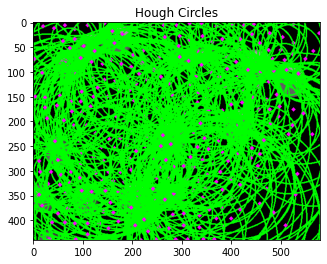

In [221]:
# Show circles
cimg = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(255,0,255),3)

plt.imshow(cimg)
plt.title("Hough Circles")

Wow! That's alot... It looks like we can form circles that are much larger than the M&Ms. Let's go back an limit to smaller circles.

In [171]:
print(sep)
mask = (hls[:,:,0]>=sep[0]) & (hls[:,:,0]<=sep[1])
print(mask.shape)

(0, 25, 'Blue')
(440, 580)


In [182]:
tmp1 = hls.copy()
tmp1[~mask[:,:], 1] = 0
tmp1[~mask[:,:], 2] = 0
print(tmp1.shape)

(440, 580, 3)


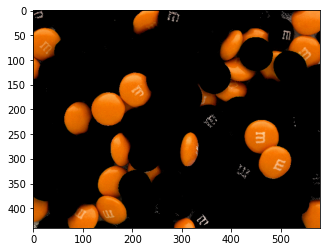

In [183]:
plt.imshow(cv2.cvtColor(tmp1, cv2.COLOR_HLS2RGB))

# Exercise 1 - Convolution

Experiment with custom convolution filters. You may start out with some very basic images that you create yourself. Then use the M&M image, or download more images.

1. Try different convolution filters from scratch
2. Can you recreate Gaussian blur, sharpeing, denoising, etc?
3. Use the corresponding OpenCV functions to compare results

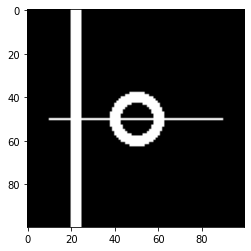

In [137]:
pic1 = np.zeros((100, 100), dtype=np.uint8)
pic1[:, 20:25] = 255                           # create a vertical bar
pic1[50, 10:90] = 255                          # create a horizontal line
pic1 = cv2.circle(pic1, (50, 50), 10, 255, 3)  # draw a circle
plt.imshow(pic1, cmap='gray')
plt.show(); plt.close()

(100, 100)


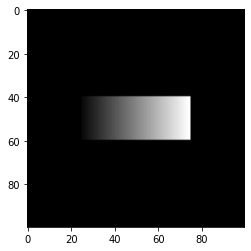

In [147]:
pic2 = np.zeros((100, 100), dtype=np.uint8)
z = np.zeros((20, 50), dtype=np.uint8)
v = np.array(range(50))*5 + 10
pic2[40:60, 25:75]= np.uint8(z+v)
print(pic2.shape)
plt.imshow(pic2, cmap='gray')
plt.show(); plt.close()

# Exercise 2 - Edge Detection

Compare Sobel `cv2.Sobel()` and Canny `cv2.Canny()` edge detection algorithms.
Just like for the previous exercise, create some simple images to understand the operations.

Reference: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_canny.html#doxid-da-d22-tutorial-py-canny


# Exercise 3 - Contours

Again, blue M&M are special. Can you draw contours around the blue M&Ms?

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Plain-M%26Ms-Pile.jpg" width="290px" height="220px">

Reference: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_table_of_contents_contours.html

# Exercise 4 - Hough Transfrom

How many M&Ms of all colors are in the image? we can start out identifying the ones that are face up and form a circle. However, what about those lying in an angle. It's possible to apply a Generalized Hough Transform on elliptical shapes, but that would also increase the complexity from 3 to 5 parameters.

There are couple of approaches that can be tried:
- Use Hough Circles, even with partial arcs that are part of an ellipse
- Stretch and rotate the image in different directions that would then reshape ellipses into circles
- scikit image offers an approach https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html

Also consider `cv2.fitEllipse`, `cv2.fitEllipseAMS`, and `cv2.fitEllipseDirect`